In [2]:
import pandas
data = pandas.read_csv('brain_size.csv', sep=';', na_values=".").head()
data 

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118.0,64.5,816932
1,2,Male,140,150,124,NaN,72.5,1001121
2,3,Male,139,123,150,143.0,73.3,1038437
3,4,Male,133,129,128,172.0,68.8,965353
4,5,Female,137,132,134,147.0,65.0,951545


In [3]:
import numpy as np
t = np.linspace(-6, 6, 20)
sin_t = np.sin(t)
cos_t = np.cos(t)

In [4]:
df = pandas.DataFrame({'t': t, 'sin': sin_t, 'cos': cos_t})  
df

,t,sin,cos
0,-6.000000,0.279415,0.960170
1,-5.368421,0.792419,0.609977
2,-4.736842,0.999701,0.024451
3,-4.105263,0.821291,-0.570509
4,-3.473684,0.326021,-0.945363
5,-2.842105,-0.295030,-0.955488
6,-2.210526,-0.802257,-0.596979
7,-1.578947,-0.999967,-0.008151
8,-0.947368,-0.811882,0.583822
9,-0.315789,-0.310567,0.950551


In [5]:
data.shape    # 40 rows and 8 columns
data.columns  # It has columns   
print(data['Gender'])  # Columns can be addressed by name   
# Simpler selector
data[data['Gender'] == 'Female']['VIQ'].mean()

0    Female
1      Male
2      Male
3      Male
4    Female
Name: Gender, dtype: object


132.0

In [6]:
groupby_gender = data.groupby('Gender')
for gender, value in groupby_gender['VIQ']:
    print((gender, value.mean()))

('Female', 132.0)
('Male', 134.0)


In [7]:
groupby_gender.mean()

,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
Gender,,,,,,,
Female,3.0,135.000000,132.0,129.0,132.5,64.750000,884238.5
Male,3.0,137.333333,134.0,134.0,157.5,71.533333,1001637.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002671DA61240>,
      dtype=object)

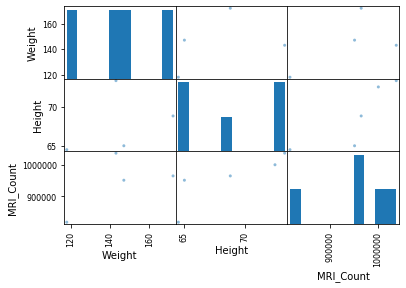

In [11]:
from pandas.plotting import scatter_matrix
pandas.plotting.scatter_matrix(data[['Weight', 'Height', 'MRI_Count']])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002671A272BE0>,
      dtype=object)

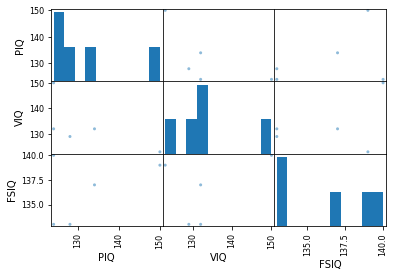

In [10]:
pandas.plotting.scatter_matrix(data[['PIQ', 'VIQ', 'FSIQ']])  

In [12]:
from scipy import stats

In [13]:
stats.ttest_1samp(data['VIQ'], 0)

Ttest_1sampResult(statistic=29.53444067255562, pvalue=7.825719971719742e-06)

In [14]:
female_viq = data[data['Gender'] == 'Female']['VIQ']
male_viq = data[data['Gender'] == 'Male']['VIQ']
stats.ttest_ind(female_viq, male_viq)  

Ttest_indResult(statistic=-0.18926408936295352, pvalue=0.8619667118907584)

In [15]:
stats.ttest_ind(data['FSIQ'], data['PIQ'])   

Ttest_indResult(statistic=0.8669214468630118, pvalue=0.4112315956435204)

In [16]:
stats.ttest_rel(data['FSIQ'], data['PIQ'])

Ttest_relResult(statistic=0.9898267954648649, pvalue=0.37829082397654096)

In [17]:
stats.ttest_1samp(data['FSIQ'] - data['PIQ'], 0) 

Ttest_1sampResult(statistic=0.9898267954648649, pvalue=0.37829082397654096)

In [18]:
stats.wilcoxon(data['FSIQ'], data['PIQ'])

C:\Users\Wirahita Putramas\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2778: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")


WilcoxonResult(statistic=4.0, pvalue=0.34523107177184)

In [22]:
import numpy as np
x = np.linspace(-5, 5, 20)
np.random.seed(1)
# normal distributed noise
y = -5 + 3*x + 4 * np.random.normal(size=x.shape)
# Create a data frame containing all the relevant variables
data = pandas.DataFrame({'x': x, 'y': y})

In [23]:
from statsmodels.formula.api import ols
model = ols("y ~ x", data).fit()

In [25]:
print(model.summary())  

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     74.03
Date:                Tue, 29 Oct 2019   Prob (F-statistic):           8.56e-08
Time:                        22:08:53   Log-Likelihood:                -57.988
No. Observations:                  20   AIC:                             120.0
Df Residuals:                      18   BIC:                             122.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.5335      1.036     -5.342      0.0

In [27]:
data = pandas.read_csv('brain_size.csv', sep=';', na_values=".")

In [28]:
model = ols("VIQ ~ Gender + 1", data).fit()
print(model.summary()) 

                            OLS Regression Results                            
Dep. Variable:                    VIQ   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.5969
Date:                Tue, 29 Oct 2019   Prob (F-statistic):              0.445
Time:                        22:09:26   Log-Likelihood:                -182.42
No. Observations:                  40   AIC:                             368.8
Df Residuals:                      38   BIC:                             372.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        109.4500      5.308     20.

In [29]:
model = ols('VIQ ~ C(Gender)', data).fit()

In [30]:
data_fisq = pandas.DataFrame({'iq': data['FSIQ'], 'type': 'fsiq'})
data_piq = pandas.DataFrame({'iq': data['PIQ'], 'type': 'piq'})
data_long = pandas.concat((data_fisq, data_piq))
print(data_long)  










model = ols("iq ~ type", data_long).fit()
print(model.summary())

     iq  type
0   133  fsiq
1   140  fsiq
2   139  fsiq
3   133  fsiq
4   137  fsiq
5    99  fsiq
6   138  fsiq
7    92  fsiq
8    89  fsiq
9   133  fsiq
10  132  fsiq
11  141  fsiq
12  135  fsiq
13  140  fsiq
14   96  fsiq
15   83  fsiq
16  132  fsiq
17  100  fsiq
18  101  fsiq
19   80  fsiq
20   83  fsiq
21   97  fsiq
22  135  fsiq
23  139  fsiq
24   91  fsiq
25  141  fsiq
26   85  fsiq
27  103  fsiq
28   77  fsiq
29  130  fsiq
..  ...   ...
10  124   piq
11  128   piq
12  124   piq
13  147   piq
14   90   piq
15   96   piq
16  120   piq
17  102   piq
18   84   piq
19   86   piq
20   86   piq
21   84   piq
22  134   piq
23  128   piq
24  102   piq
25  131   piq
26   84   piq
27  110   piq
28   72   piq
29  124   piq
30  132   piq
31  137   piq
32  110   piq
33   86   piq
34   81   piq
35  128   piq
36  124   piq
37   94   piq
38   74   piq
39   89   piq

[80 rows x 2 columns]
                            OLS Regression Results                            
Dep. Variable:                

In [31]:
stats.ttest_ind(data['FSIQ'], data['PIQ']) 

Ttest_indResult(statistic=0.465637596380964, pvalue=0.6427725009414841)

In [32]:
data = pandas.read_csv('iris.csv')
model = ols('sepal_width ~ name + petal_length', data).fit()
print(model.summary()) 

                            OLS Regression Results                            
Dep. Variable:            sepal_width   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     44.63
Date:                Tue, 29 Oct 2019   Prob (F-statistic):           1.58e-20
Time:                        22:10:44   Log-Likelihood:                -38.185
No. Observations:                 150   AIC:                             84.37
Df Residuals:                     146   BIC:                             96.41
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.9813      0

In [33]:
print(model.f_test([0, 1, -1, 0]))  

<F test: F=array([[3.24533535]]), p=0.07369058781700653, df_denom=146, df_num=1>


In [34]:
print(data)

     sepal_length  sepal_width  petal_length  petal_width       name
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
5             5.4          3.9           1.7          0.4     setosa
6             4.6          3.4           1.4          0.3     setosa
7             5.0          3.4           1.5          0.2     setosa
8             4.4          2.9           1.4          0.2     setosa
9             4.9          3.1           1.5          0.1     setosa
10            5.4          3.7           1.5          0.2     setosa
11            4.8          3.4           1.6          0.2     setosa
12            4.8          3.0           1.4          0.1     setosa
13            4.3          3.0    